# Parameters

Esta tabla contiene la información de los grupos de parámetros de funciones y Lambda expresiones. 

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

full_table = get_data('parameters')

# Table name, features and target.
TABLE_NAME = 'parameters'
TABLE_FEATURES = ['parameters__parameters_role', 'parameters__number_of_params', 'parameters__pos_only_param_pct', 'parameters__var_param_pct', 'parameters__has_var_param', 'parameters__type_annotation_pct', 'parameters__kw_only_param_pct', 'parameters__default_value_pct', 'parameters__has_kw_param', 'parameters__name_convention', 'parameters__expertise_level']
TABLE_TARGET = 'parameters__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

2025-01-17 11:35:49.196156 Loading data ...
2025-01-17 11:35:50.645868 Data successfully load!!
2025-01-17 11:35:50.645868 Creating data cache files ...
2025-01-17 11:35:50.713144 Data cache files successfully created!!
Features shape: (32884, 11)
Target shape: (32884,)
As we can see the downloaded data contains a total of 32884 instances. For each instance we have 11 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32884 entries, 0 to 32883
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   parameters__parameters_role      32884 non-null  object 
 1   parameters__number_of_params     32884 non-null  int64  
 2   parameters__pos_only_param_pct   32884 non-null  float64
 3   parameters__var_param_pct        32884 non-null  float64
 4   parameters__has_var_param        32884 non-null  bool   
 5   parameters__type_annotation_pct  32884 non-null  float64
 6   parameters__kw_only_param_pct    32884 non-null  float64
 7   parameters__default_value_pct    32884 non-null  float64
 8   parameters__has_kw_param         32884 non-null  bool   
 9   parameters__name_convention      27777 non-null  object 
 10  parameters__expertise_level      32884 non-null  object 
dtypes: bool(2), float64(5), int64(1), object(3)
memory usage: 2.3+ MB
None
<class 'p

Cómo podemos ver la tabla está compuesta por 6 variables numéricas, 2 variables boleanas y tres de tipo objeto.

### 2.1 - Equilibrado de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "PROFESSIONAL"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for PROFESSIONAL class.")

The dataset contains 33.1% instances for BEGINNER class and 0.0% for EXPERT class.


### 2.2 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

parameters__parameters_role           0
parameters__number_of_params          0
parameters__pos_only_param_pct        0
parameters__var_param_pct             0
parameters__has_var_param             0
parameters__type_annotation_pct       0
parameters__kw_only_param_pct         0
parameters__default_value_pct         0
parameters__has_kw_param              0
parameters__name_convention        5107
parameters__expertise_level           0
dtype: int64

In [5]:
print_empty_cols(X)

parameters__parameters_role
---------------------------
0 instancias no tienen un valor para la columna parameters__parameters_role


parameters__number_of_params
----------------------------
0 instancias no tienen un valor para la columna parameters__number_of_params


parameters__pos_only_param_pct
------------------------------
0 instancias no tienen un valor para la columna parameters__pos_only_param_pct


parameters__var_param_pct
-------------------------
0 instancias no tienen un valor para la columna parameters__var_param_pct


parameters__has_var_param
-------------------------
0 instancias no tienen un valor para la columna parameters__has_var_param


parameters__type_annotation_pct
-------------------------------
0 instancias no tienen un valor para la columna parameters__type_annotation_pct


parameters__kw_only_param_pct
-----------------------------
0 instancias no tienen un valor para la columna parameters__kw_only_param_pct


parameters__default_value_pct
--------------

### 2.3 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
parameters__parameters_role,32884,2,FunctionParams,31908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameters__number_of_params,32884.0,NaN,NaN,NaN,2.049538,2.159277,0.0,1.0,2.0,3.0,37.0
parameters__pos_only_param_pct,32884.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
parameters__var_param_pct,32884.0,NaN,NaN,NaN,0.005187,0.048423,0.0,0.0,0.0,0.0,1.0
parameters__has_var_param,32884,2,False,32439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameters__type_annotation_pct,32884.0,NaN,NaN,NaN,0.262222,0.369951,0.0,0.0,0.0,0.666667,1.0
parameters__kw_only_param_pct,32884.0,NaN,NaN,NaN,0.002527,0.043165,0.0,0.0,0.0,0.0,1.0
parameters__default_value_pct,32884.0,NaN,NaN,NaN,0.079625,0.20325,0.0,0.0,0.0,0.0,1.0
parameters__has_kw_param,32884,2,False,29538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameters__name_convention,27777,7,Lower,19795,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "parameters__number_of_params": [(0.0, 1.0), (1.0, 2.0), (2.0, 2.0), (2.0, inf)], # min: 0 ; max: 58
    "parameters__pos_only_param_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
    "parameters__var_param_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "parameters__type_annotation_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
    "parameters__kw_only_param_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
    "parameters__default_value_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['parameters__number_of_params'], 10))
print(get_statistics(X_copy, ['parameters__pos_only_param_pct'], 10))
print(get_statistics(X_copy, ['parameters__var_param_pct'], 10))
print(get_statistics(X_copy, ['parameters__type_annotation_pct'], 10))
print(get_statistics(X_copy, ['parameters__kw_only_param_pct'], 10))
print(get_statistics(X_copy, ['parameters__default_value_pct'], 10))
print(get_statistics(full_table, ['parameters__name_convention'], 10))
print(get_statistics(full_table, ['parameters__parameters_role'], 10))
print(get_statistics(X_copy, ['parameters__has_var_param'], 10))
print(get_statistics(X_copy, ['parameters__has_kw_param'], 10))
# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_SnakeCase'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
parameters__number_of_params  count  percentage
                   [1.0_2.0)  10918   33.201557
                   [2.0_inf]   9179   27.913271
                   [2.0_2.0]   7680   23.354823
                   [0.0_1.0)   5107   15.530349

parameters__pos_only_param_pct  count  percentage
                     [0.0_0.0]  32884       100.0

parameters__var_param_pct  count  percentage
                [0.0_0.0]  32439   98.646758
                [0.0_inf]    445    1.353242

parameters__type_annotation_pct  count  percentage
                      [0.0_0.0]  21109   64.192312
                      [0.0_inf]  11775   35.807688

parameters__kw_only_param_pct  count  percentage
                    [0.0_0.0]  32748   99.586425
                    [0.0_inf]    136    0.413575

parameters__default_value_pct  count  percentage
                    [0.0_0.0]  27718   84.290232
                    [0.0_inf]   5166   15.709768

parameters__name_convention  count  percentage
  

In [8]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (32884, 19)
Target shape: (32884,)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

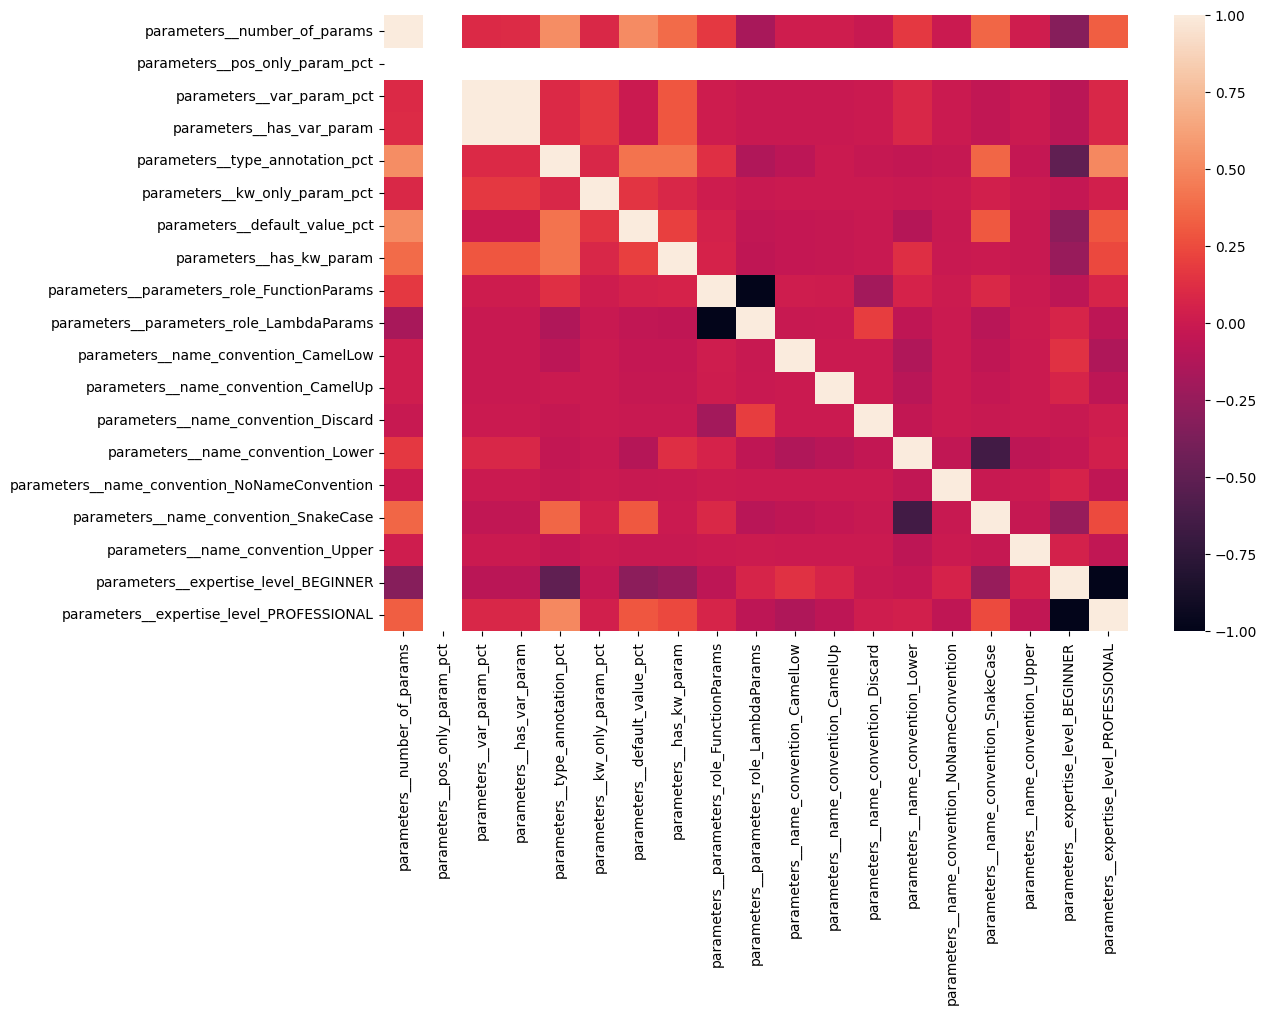

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(method='spearman'), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 10 variable (2 booleanas, 5 porcentuales, 1 numerica y 2 categoricas) se hara un analisis detallado

### Variable has_var_param (1/10)
Esta variable es de tipo booleano y representa existe al menos un parámetro del tipo vararg.

<Axes: xlabel='parameters__has_var_param', ylabel='Count'>

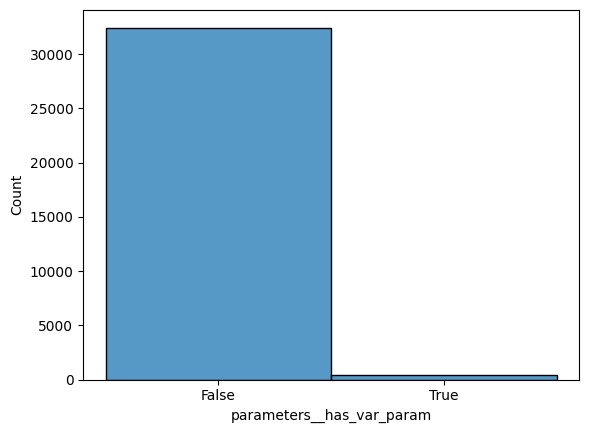

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['parameters__has_var_param'], discrete=True)

In [11]:
num_true_values = len(X[X['parameters__has_var_param'] == True])
num_false_values = len(X[X['parameters__has_var_param'] == False])
std = X['parameters__has_var_param'].std()
freq_true = len(X[X['parameters__has_var_param'] == True]) / len(X['parameters__has_var_param'])
freq_false = len(X[X['parameters__has_var_param'] == False]) / len(X['parameters__has_var_param'])
print(f'La variable has_var_param contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_var_param a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_var_param a False es {freq_false}.')

La variable has_var_param contiene 445 valores verdaderos y 32439 valores falsos. Y, la desviación típica es de 0.11554089188575745
La frecuencia con la que programa puede tener la variable has_var_param a True es 0.013532416980902566.
La frecuencia con la que programa puede tener la variable has_var_param a False es 0.9864675830190974.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'parameters__has_var_param', possible_values)

La variable parameters__has_var_param contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable parameters__has_var_param toma el valor de 0.0 en un 98.65% de los items.
La variable parameters__has_var_param toma el valor de 1.0 en un 1.353% de los items.


In [13]:
X[X['parameters__has_var_param'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_PROFESSIONAL
count,445.000000,445.0,445.000000,445.0,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.0,445.0,445.0,445.000000,445.0,445.000000,445.0,445.00000,445.00000
mean,3.152809,0.0,0.383274,1.0,0.564338,0.036372,0.054986,0.849438,0.988764,0.011236,0.0,0.0,0.0,0.948315,0.0,0.051685,0.0,0.01573,0.98427
std,1.874202,0.0,0.168573,0.0,0.391233,0.118964,0.147162,0.358024,0.105521,0.105521,0.0,0.0,0.0,0.221640,0.0,0.221640,0.0,0.12457,0.12457
min,1.000000,0.0,0.058824,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.00000
25%,2.000000,0.0,0.333333,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.00000,1.00000
50%,3.000000,0.0,0.333333,1.0,0.666667,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.00000,1.00000
75%,3.000000,0.0,0.500000,1.0,0.916667,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.00000,1.00000
max,17.000000,0.0,1.000000,1.0,1.000000,0.823529,0.823529,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,1.00000,1.00000


### Variable has_kw_param (2/10)
Esta variable es de tipo booleano y representa si existe al menos un parámetro del tipo kwarg.

<Axes: xlabel='parameters__has_kw_param', ylabel='Count'>

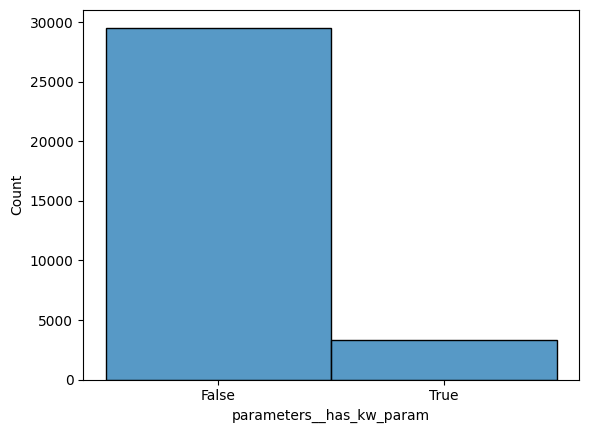

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['parameters__has_kw_param'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['parameters__has_kw_param'] == True])
num_false_values = len(X[X['parameters__has_kw_param'] == False])
std = X['parameters__has_kw_param'].std()
freq_true = len(X[X['parameters__has_kw_param'] == True]) / len(X['parameters__has_kw_param'])
freq_false = len(X[X['parameters__has_kw_param'] == False]) / len(X['parameters__has_kw_param'])
print(f'La variable has_kw_param contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_kw_param a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_kw_param a False es {freq_false}.')

La variable has_kw_param contiene 3346 valores verdaderos y 29538 valores falsos. Y, la desviación típica es de 0.3023259937763214
La frecuencia con la que programa puede tener la variable has_kw_param a True es 0.10175161172606739.
La frecuencia con la que programa puede tener la variable has_kw_param a False es 0.8982483882739326.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'parameters__has_kw_param', possible_values)

La variable parameters__has_kw_param contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable parameters__has_kw_param toma el valor de 0.0 en un 89.82% de los items.
La variable parameters__has_kw_param toma el valor de 1.0 en un 10.18% de los items.


In [17]:
X[X['parameters__has_kw_param'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_PROFESSIONAL
count,3346.000000,3346.0,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.0,3346.000000,3346.000000,3346.0,3346.0,3346.0,3346.000000,3346.0,3346.00000,3346.000000,3346.000000,3346.000000
mean,4.184997,0.0,0.039309,0.112971,0.702146,0.008131,0.169789,1.0,0.998506,0.001494,0.0,0.0,0.0,0.781231,0.0,0.21847,0.000299,0.000299,0.999701
std,2.838582,0.0,0.115521,0.316604,0.201751,0.063147,0.253628,0.0,0.038633,0.038633,0.0,0.0,0.0,0.413473,0.0,0.41327,0.017288,0.017288,0.017288
min,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
25%,3.000000,0.0,0.000000,0.000000,0.666667,0.000000,0.000000,1.0,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.00000,0.000000,0.000000,1.000000
50%,3.000000,0.0,0.000000,0.000000,0.666667,0.000000,0.000000,1.0,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.00000,0.000000,0.000000,1.000000
75%,4.000000,0.0,0.000000,0.000000,0.800000,0.000000,0.250000,1.0,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.00000,0.000000,0.000000,1.000000
max,26.000000,0.0,0.500000,1.000000,1.000000,0.846154,0.923077,1.0,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,1.00000,1.000000,1.000000,1.000000


El 82% de los parameters con has_kw_param a True es de programas de EXPERTOS.

### Variable number_of_params (3/10)
Esta variable representa el número de parámetros que hay en el conjuto de la entidad parameters. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 37. Con una media de 2.05.

<Axes: ylabel='parameters__number_of_params'>

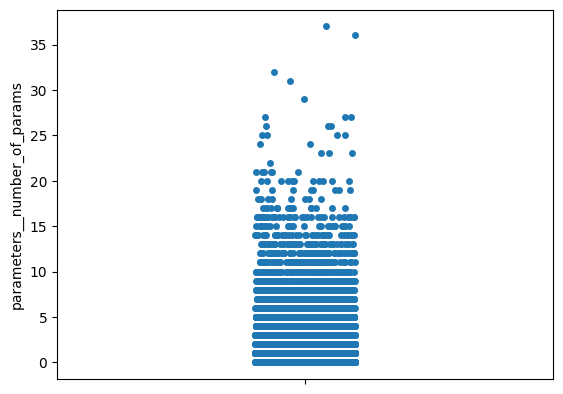

In [18]:
sns.stripplot(X['parameters__number_of_params'])

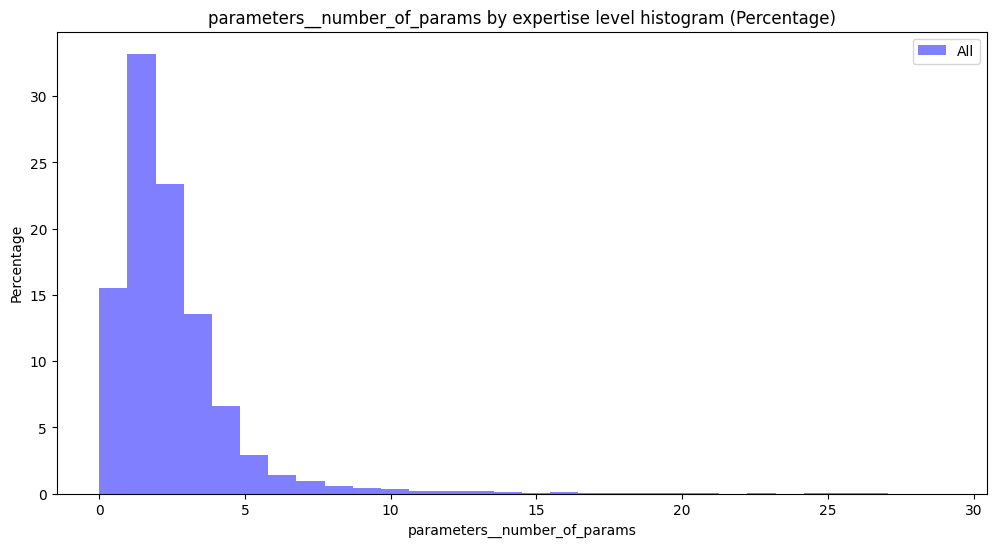

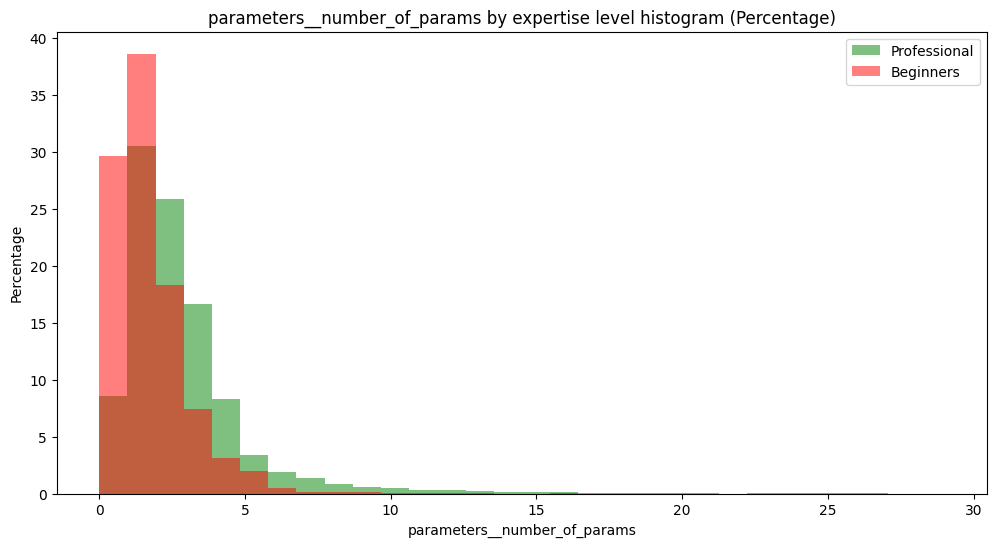

In [19]:
print_histogram(X, 'parameters__number_of_params', 'parameters__expertise_level', bins=30, include_all=True, include_beginners=False, include_experts=False, max_value=30)
print_histogram(X, 'parameters__number_of_params', 'parameters__expertise_level', bins=30, include_all=False, max_value=30)

In [20]:
print_outliers_for_df_column(X, 'parameters__number_of_params')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8853944367256024
Rango valores atípicos extremos (Tukey): [-5.0,9.0]
Rango valores atípicos leves (Tukey): [-2.0,6.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.8647010142139425,106.56402656224185]
-3.0IQR: 0 instancias tienen un valor para parameters__number_of_params inferior a -5.0 (Q1-3*IQR) para parameters__number_of_params. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__number_of_params inferior a -2.0 (Q1-1.5*IQR) para parameters__number_of_params. Representando un 0.0% del total de instancias.
+1.5IQR: 1127 instancias tienen un valor para parameters__number_of_params superior a 6.0 (Q3+1.5*IQR) para parameters__number_of_params. Representando un 3.427% del total de instancias.
+3.0IQR: 476 instancias tienen un valor para parameters__number_of_params superior a 9.0 (Q3-3*IQR) para parameters__number_of_params. Representando un 1.448% del total de instancias

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 9 (Con un MC de 88 usamos Tukey Extremo)

In [51]:
X[X['parameters__number_of_params'] > 9].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_PROFESSIONAL
count,476.00000,476.0,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.0,476.0,476.0,476.000000,476.0,476.000000,476.0,476.000000,476.000000,476.000000,476.000000
mean,13.52521,0.0,0.001402,0.018908,0.741900,0.012945,0.708218,0.399160,1.0,0.0,0.0,0.004202,0.0,0.117647,0.0,0.869748,0.008403,0.016807,0.983193
std,4.01699,0.0,0.010209,0.136342,0.363065,0.101302,0.287607,0.490241,0.0,0.0,0.0,0.064752,0.0,0.322529,0.0,0.336935,0.091380,0.128682,0.128682
min,10.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,11.00000,0.0,0.000000,0.000000,0.900000,0.000000,0.700000,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,1.000000
50%,12.00000,0.0,0.000000,0.000000,0.916667,0.000000,0.818182,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,1.000000
75%,15.00000,0.0,0.000000,0.000000,0.928571,0.000000,0.888889,1.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,1.000000
max,37.00000,0.0,0.083333,1.000000,1.000000,0.923077,1.000000,1.000000,1.0,0.0,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


El 98% de es de expertos.

### Variable pos_only_param_pct (4/10)
Esta variable representa la proporción de los parámetros pos_only. Toma los valores de 0.0 - 0.0. La media es 0.0.

### Variable type_annotation_pct (5/10)
Esta variable representa la proporción de los parámetros que tienen anotación de tipo. Este campo toma valores del 0.0 - 1.0. Su media es 0.26.

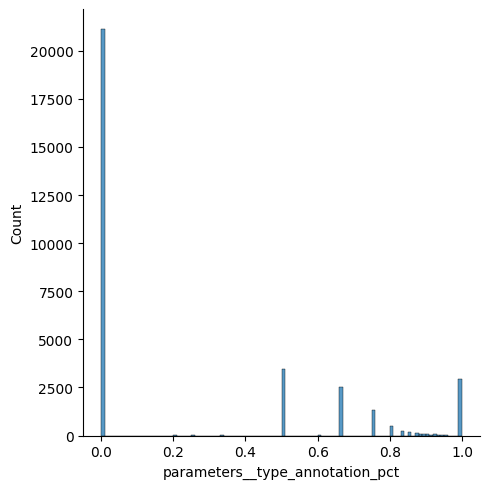

In [26]:
sns.displot(X['parameters__type_annotation_pct'], bins=[i / 100 for i in range(0, 101)])

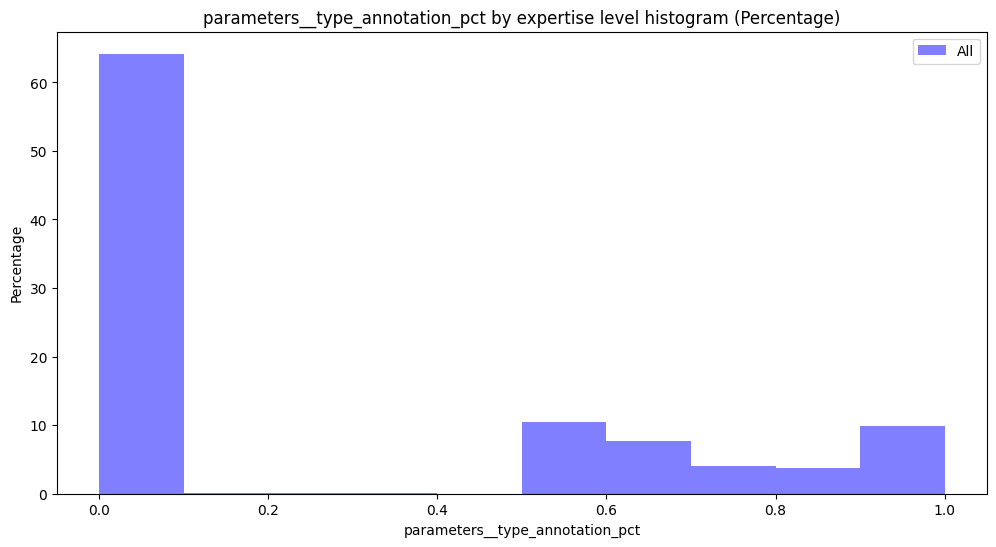

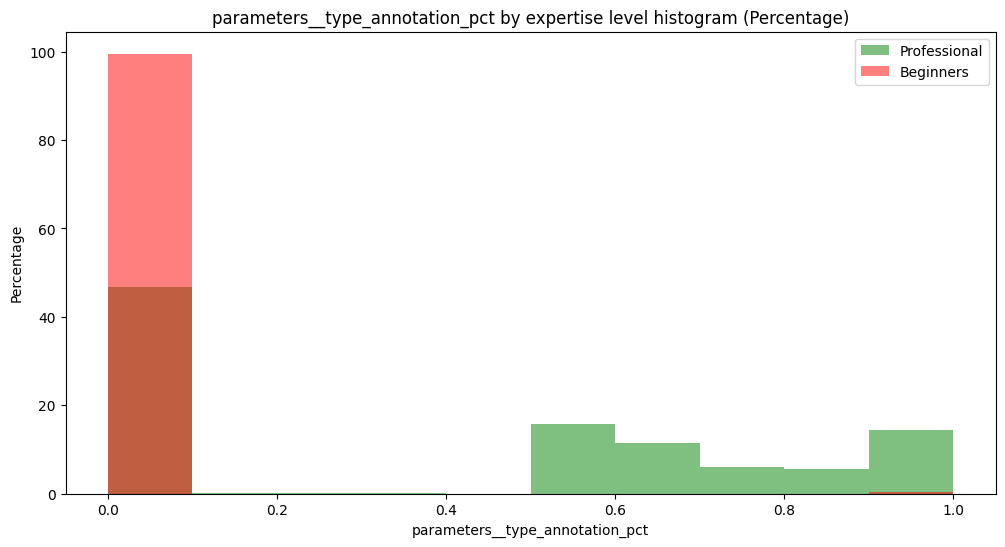

In [27]:
print_histogram(X, 'parameters__type_annotation_pct', 'parameters__expertise_level', bins=10, include_all=True, include_beginners=False, include_experts=False)
print_histogram(X, 'parameters__type_annotation_pct', 'parameters__expertise_level', bins=10, include_all=False)

In [28]:
print_outliers_for_df_column(X, 'parameters__type_annotation_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.36782675981521606
Rango valores atípicos extremos (Tukey): [-2.0000000596046448,2.6666667461395264]
Rango valores atípicos leves (Tukey): [-1.0000000298023224,1.666666716337204]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.2759891765173083,5.02159029509911]
-3.0IQR: 0 instancias tienen un valor para parameters__type_annotation_pct inferior a -2.0000000596046448 (Q1-3*IQR) para parameters__type_annotation_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__type_annotation_pct inferior a -1.0000000298023224 (Q1-1.5*IQR) para parameters__type_annotation_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para parameters__type_annotation_pct superior a 1.666666716337204 (Q3+1.5*IQR) para parameters__type_annotation_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para parameters__type_annota

No se detectan outliers ni con Tukey ni con U

### Variable var_param_pct (6/10)
Esta variable representa la proporción de los parámetros que son del tipo vararg. Este campo toma valores del 0.0 - 1.0. Su media es 0.00518.

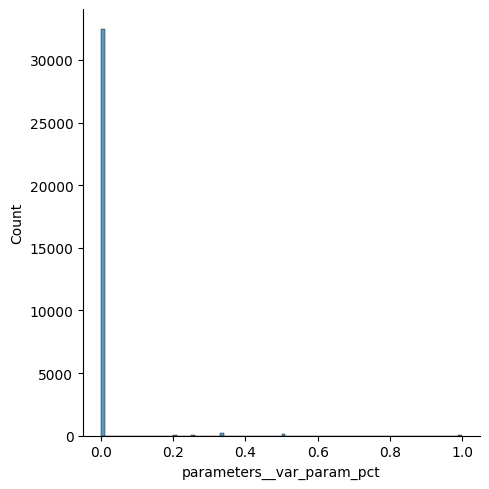

In [30]:
sns.displot(X['parameters__var_param_pct'], bins=[i / 100 for i in range(0, 101)])

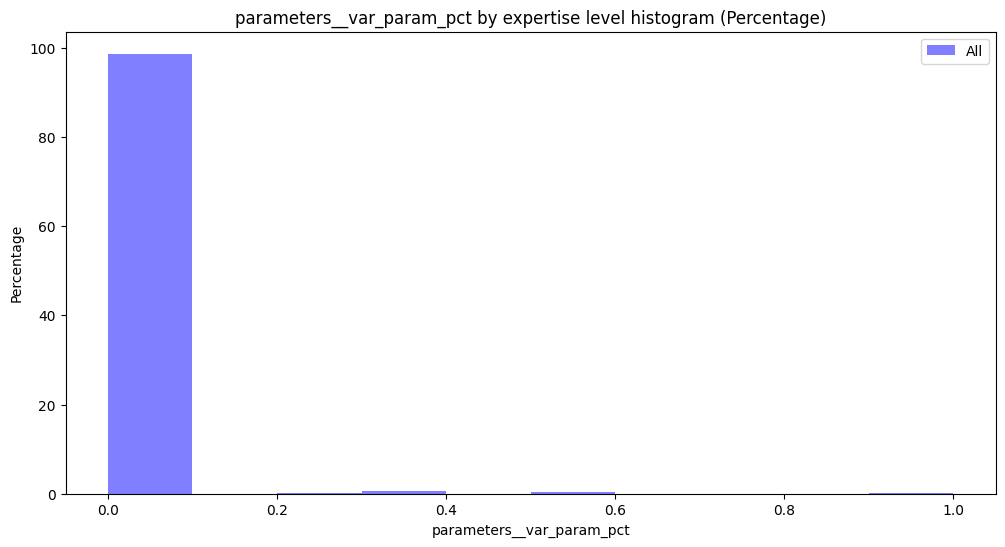

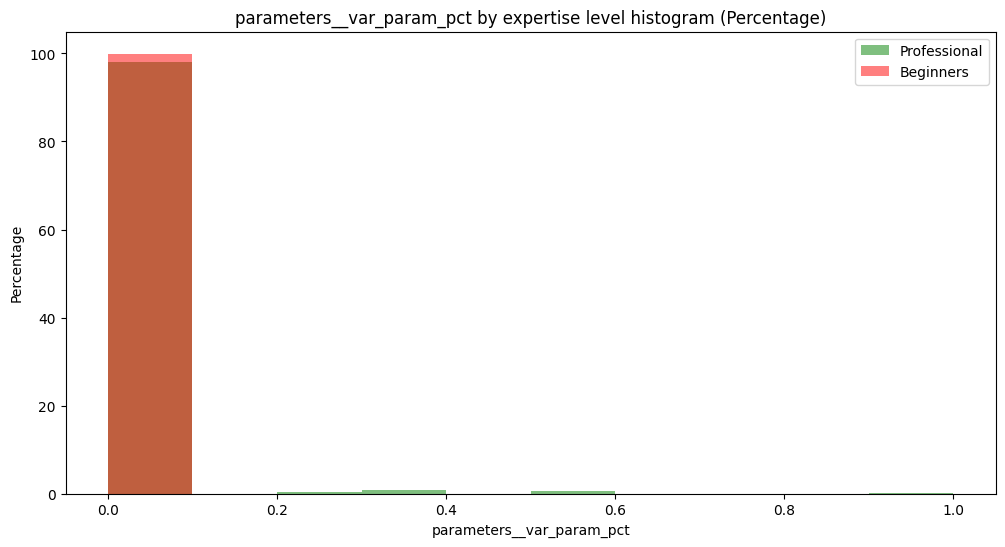

In [31]:
print_histogram(X, 'parameters__var_param_pct', 'parameters__expertise_level', bins=10, include_all=True, include_beginners=False, include_experts=False)
print_histogram(X, 'parameters__var_param_pct', 'parameters__expertise_level', bins=10, include_all=False)

In [32]:
print_outliers_for_df_column(X, 'parameters__var_param_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9438509396112933
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__var_param_pct inferior a 0.0 (Q1-3*IQR) para parameters__var_param_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__var_param_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__var_param_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 445 instancias tienen un valor para parameters__var_param_pct superior a 0.0 (Q3+1.5*IQR) para parameters__var_param_pct. Representando un 1.353% del total de instancias.
+3.0IQR: 445 instancias tienen un valor para parameters__var_param_pct superior a 0.0 (Q3-3*IQR) para parameters__var_param_pct. Representando un 1.353% del total de instancias.
L: 0 instancias tienen un valor para parameters__var_para

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [33]:
X[X['parameters__var_param_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_PROFESSIONAL
count,445.000000,445.0,445.000000,445.0,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.0,445.0,445.0,445.000000,445.0,445.000000,445.0,445.00000,445.00000
mean,3.152809,0.0,0.383274,1.0,0.564338,0.036372,0.054986,0.849438,0.988764,0.011236,0.0,0.0,0.0,0.948315,0.0,0.051685,0.0,0.01573,0.98427
std,1.874202,0.0,0.168573,0.0,0.391233,0.118964,0.147162,0.358024,0.105521,0.105521,0.0,0.0,0.0,0.221640,0.0,0.221640,0.0,0.12457,0.12457
min,1.000000,0.0,0.058824,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.00000
25%,2.000000,0.0,0.333333,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.00000,1.00000
50%,3.000000,0.0,0.333333,1.0,0.666667,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.00000,1.00000
75%,3.000000,0.0,0.500000,1.0,0.916667,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.00000,1.00000
max,17.000000,0.0,1.000000,1.0,1.000000,0.823529,0.823529,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,1.00000,1.00000


### Variable kw_only_param_pct (7/10)
Esta variable representa la proporción de los parámetros del tipo kw_only. Este campo toma valores del 0.0 - 1.0. Su media es 0.0025.

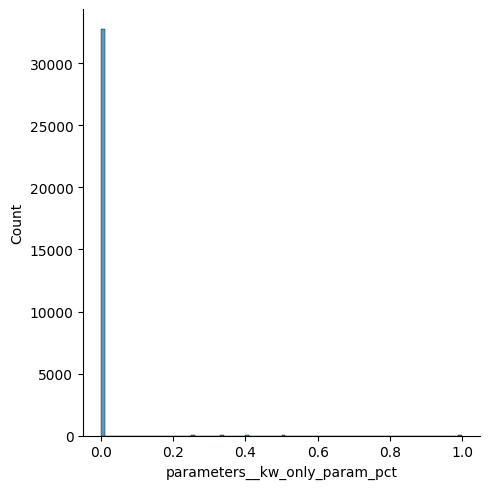

In [34]:
sns.displot(X['parameters__kw_only_param_pct'], bins=[i / 100 for i in range(0, 101)])

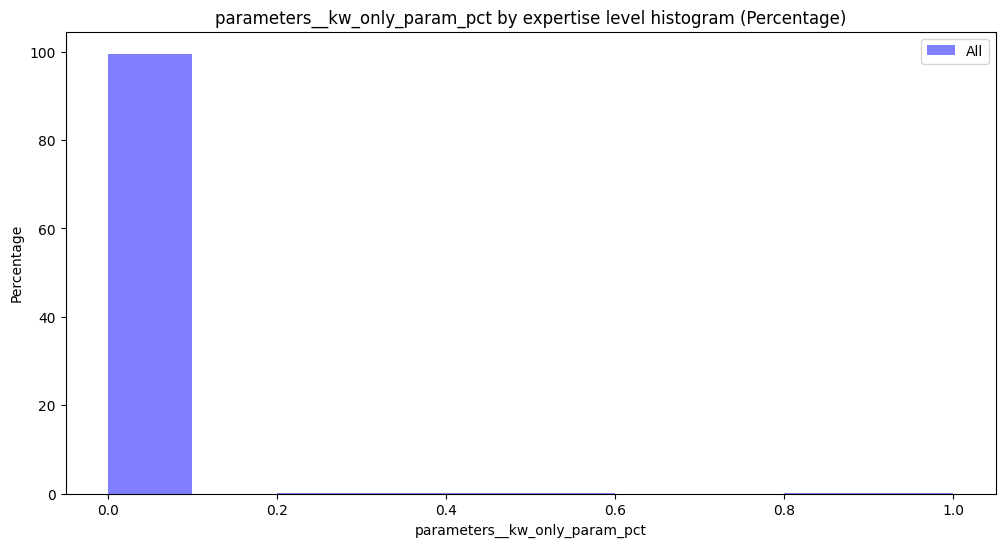

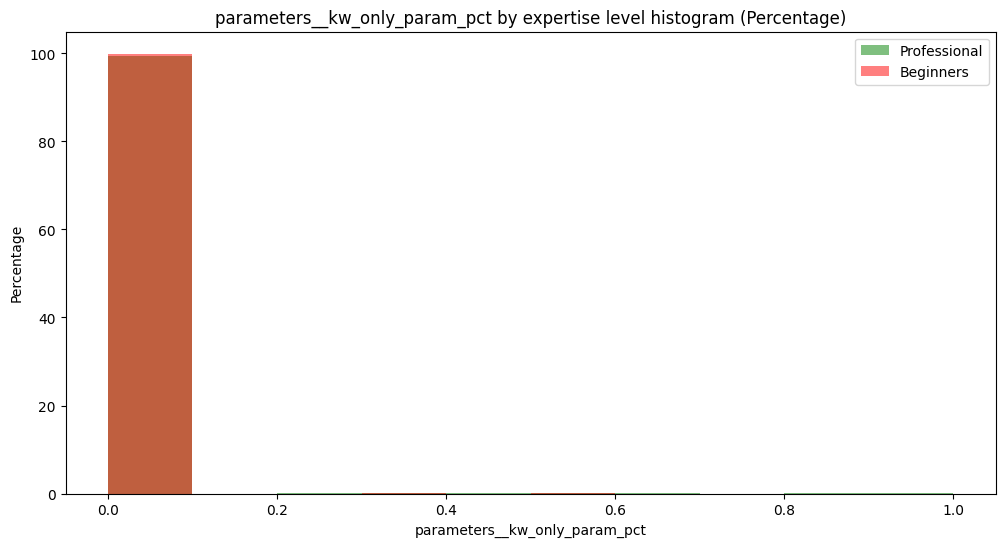

In [35]:
print_histogram(X, 'parameters__kw_only_param_pct', 'parameters__expertise_level', bins=10, include_all=True, include_beginners=False, include_experts=False)
print_histogram(X, 'parameters__kw_only_param_pct', 'parameters__expertise_level', bins=10, include_all=False)

In [36]:
print_outliers_for_df_column(X, 'parameters__kw_only_param_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9694639328217478
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__kw_only_param_pct inferior a 0.0 (Q1-3*IQR) para parameters__kw_only_param_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__kw_only_param_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__kw_only_param_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 136 instancias tienen un valor para parameters__kw_only_param_pct superior a 0.0 (Q3+1.5*IQR) para parameters__kw_only_param_pct. Representando un 0.4136% del total de instancias.
+3.0IQR: 136 instancias tienen un valor para parameters__kw_only_param_pct superior a 0.0 (Q3-3*IQR) para parameters__kw_only_param_pct. Representando un 0.4136% del total de instancias.
L: 0 instancias tienen 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [37]:
X[X['parameters__kw_only_param_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_PROFESSIONAL
count,136.000000,136.0,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.0,136.0,136.0,136.0,136.0,136.000000,136.0,136.000000,136.0,136.000000,136.000000
mean,5.250000,0.0,0.062428,0.316176,0.752773,0.611036,0.617470,0.470588,1.0,0.0,0.0,0.0,0.0,0.529412,0.0,0.470588,0.0,0.058824,0.941176
std,2.945807,0.0,0.098208,0.466702,0.303825,0.281534,0.279927,0.500979,0.0,0.0,0.0,0.0,0.0,0.500979,0.0,0.500979,0.0,0.236164,0.236164
min,1.000000,0.0,0.000000,0.000000,0.000000,0.200000,0.200000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,3.750000,0.0,0.000000,0.000000,0.750000,0.400000,0.400000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.000000
50%,5.000000,0.0,0.000000,0.000000,0.816667,0.500000,0.500000,0.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.000000,1.000000
75%,6.000000,0.0,0.166667,1.000000,1.000000,0.888889,0.888889,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.000000,1.000000
max,17.000000,0.0,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000


86% expertos y 14% beginners

### Variable default_value_pct (8/10)
Esta variable representa la proporción de los parámetros que tienen valor por defecto. Este campo toma valores del 0.0 - 1.0. Su media es 0.0796.

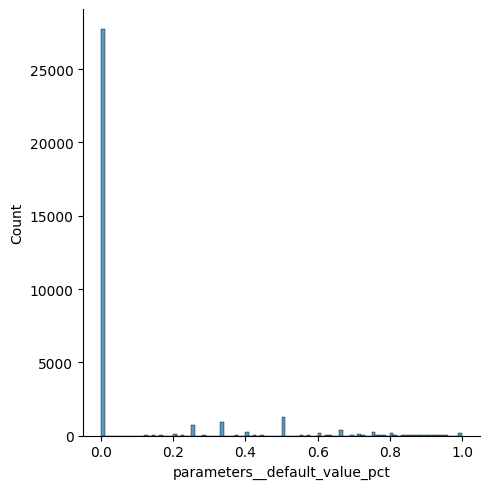

In [38]:
sns.displot(X['parameters__default_value_pct'], bins=[i / 100 for i in range(0, 101)])

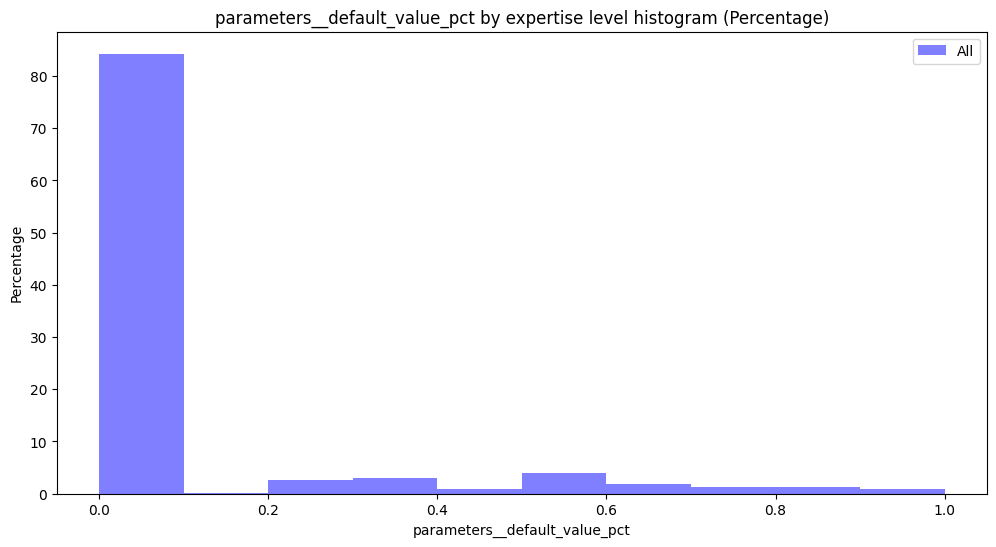

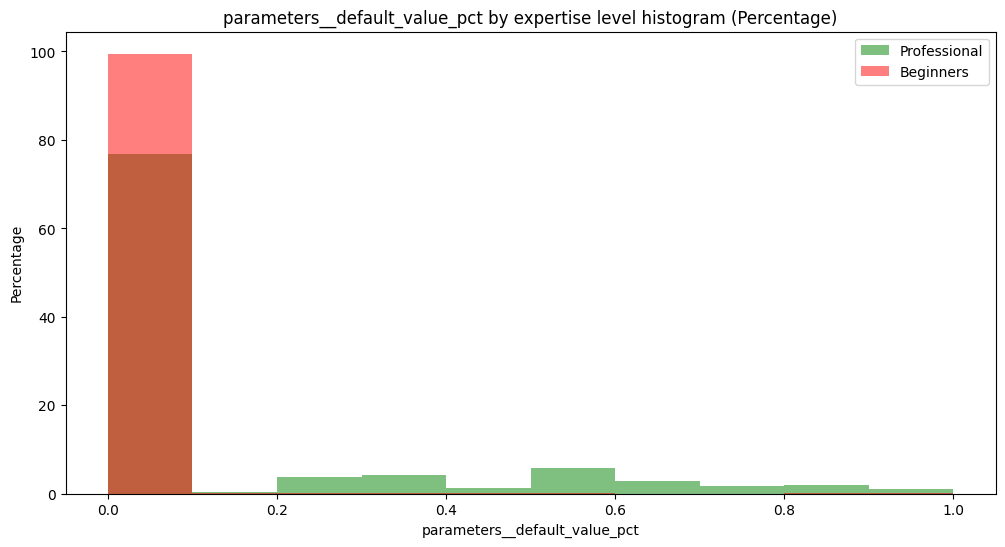

In [39]:
print_histogram(X, 'parameters__default_value_pct', 'parameters__expertise_level', bins=10, include_all=True, include_beginners=False, include_experts=False)
print_histogram(X, 'parameters__default_value_pct', 'parameters__expertise_level', bins=10, include_all=False)

In [40]:
print_outliers_for_df_column(X, 'parameters__default_value_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.76430685051021
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__default_value_pct inferior a 0.0 (Q1-3*IQR) para parameters__default_value_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__default_value_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__default_value_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 5166 instancias tienen un valor para parameters__default_value_pct superior a 0.0 (Q3+1.5*IQR) para parameters__default_value_pct. Representando un 15.71% del total de instancias.
+3.0IQR: 5166 instancias tienen un valor para parameters__default_value_pct superior a 0.0 (Q3-3*IQR) para parameters__default_value_pct. Representando un 15.71% del total de instancias.
L: 0 instancias tienen un

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [41]:
X[X['parameters__default_value_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_PROFESSIONAL
count,5166.000000,5166.0,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.0,5166.000000,5166.0,5166.000000,5166.000000,5166.000000,5166.000000
mean,4.822299,0.0,0.002602,0.012776,0.610158,0.016086,0.506852,0.247000,0.990321,0.009679,0.001742,0.000194,0.0,0.496709,0.0,0.500387,0.000968,0.010066,0.989934
std,3.279048,0.0,0.023920,0.112317,0.348098,0.107907,0.215453,0.431308,0.097912,0.097912,0.041707,0.013913,0.0,0.500038,0.0,0.500048,0.031099,0.099832,0.099832
min,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,4.000000,0.0,0.000000,0.000000,0.750000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,1.000000
75%,6.000000,0.0,0.000000,0.000000,0.857143,0.000000,0.666667,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,1.000000,0.000000,0.000000,1.000000
max,37.000000,0.0,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Variable parameters_role (9/10)
Esta variable es de tipo categorica y representa si la entidad parameters proviene de una función de una Lambda expresión.

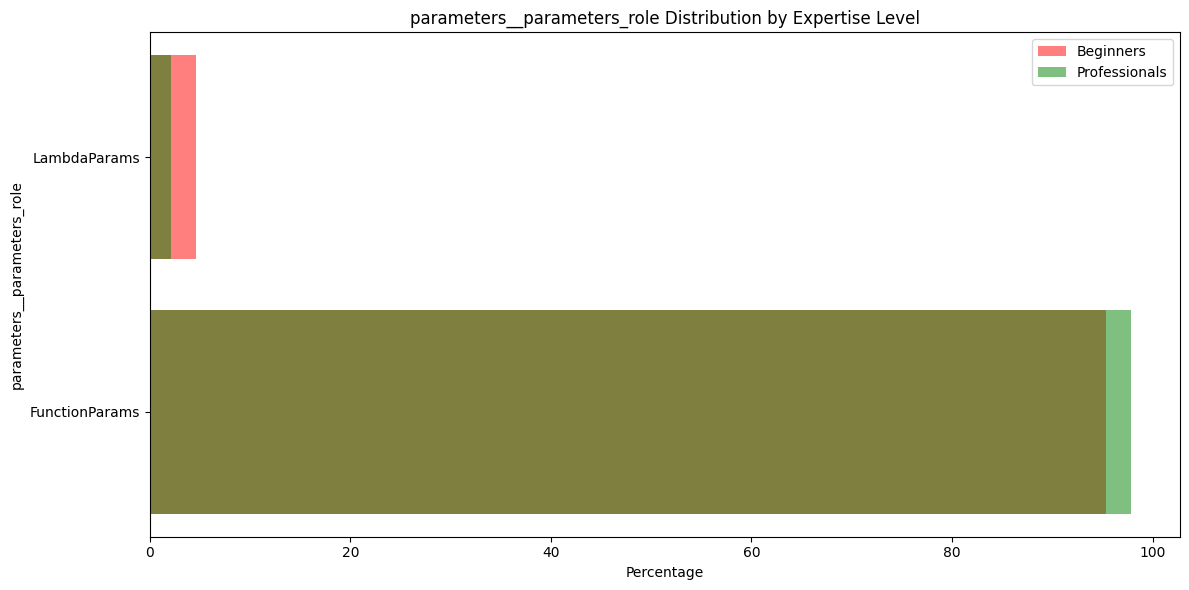

In [42]:
print_categorical_histogram(full_table, 'parameters__parameters_role', TABLE_TARGET, include_all = False)

In [43]:
print_frequency_anal_for_cat_var(full_table, 'parameters__parameters_role')

La variable parameters__parameters_role contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable parameters__parameters_role toma el valor de FunctionParams en un 97.03% de los items.
La variable parameters__parameters_role toma el valor de LambdaParams en un 2.968% de los items.


In [44]:
print_values_usage_for_cat_var(full_table, 'parameters__parameters_role', PARAMETER_ROLE_VALUES)

La variable parameters__parameters_role puede tomar 2 valores distintos
	2 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


### Variable name_convention (10/10)
Esta variable es de tipo categorica y representa el name convention del nombre del parámetro.

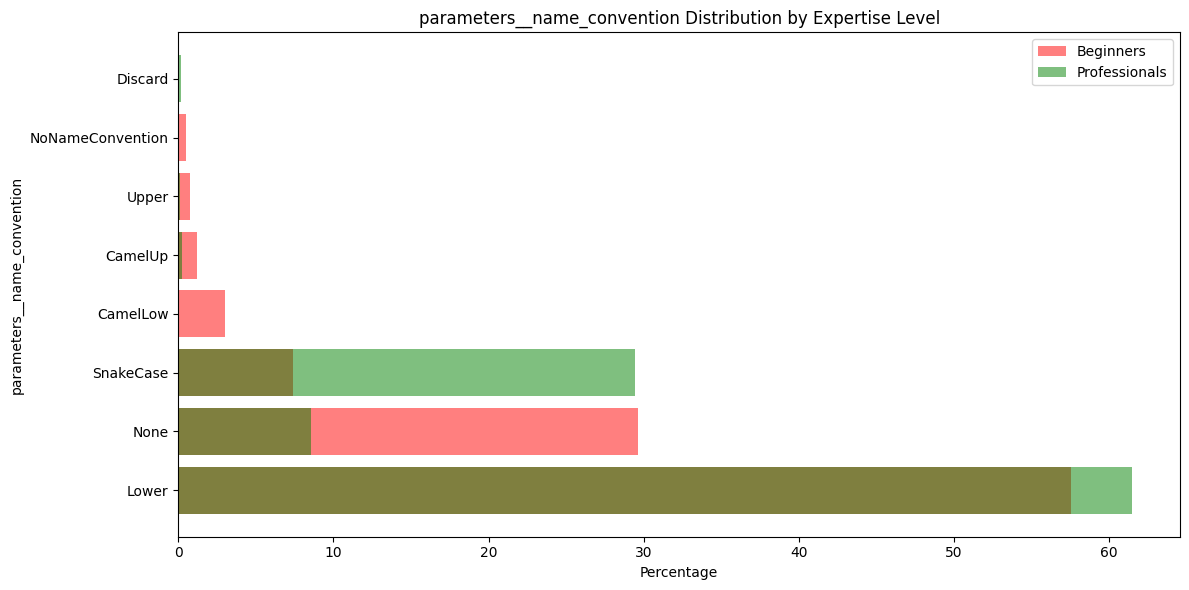

In [45]:
print_categorical_histogram(full_table, 'parameters__name_convention', TABLE_TARGET, fillna=True, include_all=False)

In [46]:
print_frequency_anal_for_cat_var(full_table, 'parameters__name_convention')

La variable parameters__name_convention contiene 8 valores distintos.
El umbral de outlier es de 0.025%
La variable parameters__name_convention toma el valor de Lower en un 60.2% de los items.
La variable parameters__name_convention toma el valor de SnakeCase en un 22.13% de los items.
La variable parameters__name_convention toma el valor de None en un 15.53% de los items.
La variable parameters__name_convention toma el valor de CamelLow en un 1.043% de los items.
La variable parameters__name_convention toma el valor de CamelUp en un 0.5261% de los items.
La variable parameters__name_convention toma el valor de Upper en un 0.3041% de los items.
La variable parameters__name_convention toma el valor de NoNameConvention en un 0.1612% de los items.
La variable parameters__name_convention toma el valor de Discard en un 0.1095% de los items.


In [47]:
print_values_usage_for_cat_var(full_table, 'parameters__name_convention', NAMING_CONVENTION_VALUES)

La variable parameters__name_convention puede tomar 7 valores distintos
	8 (114.3%) valores utilizados
	0 (0.0%) valores NO utilizados
La variable parameters__name_convention toma 1 valores desconocidos
		La variable parameters__name_convention toma valor el desconocido None.


## Multivariate

Isolation forest algorithm

In [48]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,parameters__parameters_role,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__has_kw_param,parameters__default_value_pct,parameters__name_convention,parameters__expertise_level
4778,LambdaParams,2,0.0,0.500000,True,0.000000,0.000000,True,0.000000,Lower,PROFESSIONAL
4779,LambdaParams,2,0.0,0.500000,True,0.000000,0.000000,True,0.000000,Lower,PROFESSIONAL
4781,LambdaParams,2,0.0,0.500000,True,0.000000,0.000000,True,0.000000,Lower,PROFESSIONAL
4782,LambdaParams,2,0.0,0.500000,True,0.000000,0.000000,True,0.000000,Lower,PROFESSIONAL
5606,LambdaParams,3,0.0,0.333333,True,0.000000,0.000000,True,0.000000,Lower,PROFESSIONAL
6845,FunctionParams,12,0.0,0.083333,True,0.916667,0.000000,True,0.750000,Lower,PROFESSIONAL
11266,FunctionParams,12,0.0,0.083333,True,0.916667,0.000000,True,0.750000,Lower,PROFESSIONAL
11906,FunctionParams,16,0.0,0.062500,True,0.937500,0.500000,True,0.750000,SnakeCase,PROFESSIONAL
13126,FunctionParams,12,0.0,0.083333,True,0.916667,0.000000,True,0.750000,Lower,PROFESSIONAL
13325,FunctionParams,17,0.0,0.058824,True,0.941176,0.823529,True,0.823529,SnakeCase,PROFESSIONAL


### IMPORTANTE
Revisar los outliers detectados.

In [49]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
parameters__number_of_params,18.0,7.388889,6.344418,1.0,2.000000,4.500000,12.000000,17.000000
parameters__pos_only_param_pct,18.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
parameters__var_param_pct,18.0,0.171324,0.196147,0.0,0.059743,0.083333,0.291667,0.500000
parameters__has_var_param,18.0,0.777778,0.427793,0.0,1.000000,1.000000,1.000000,1.000000
parameters__type_annotation_pct,18.0,0.458306,0.472135,0.0,0.000000,0.416667,0.916667,0.941176
parameters__kw_only_param_pct,18.0,0.173529,0.299625,0.0,0.000000,0.000000,0.375000,0.823529
parameters__default_value_pct,18.0,0.590196,0.396547,0.0,0.125000,0.750000,0.817647,1.000000
parameters__has_kw_param,18.0,0.777778,0.427793,0.0,1.000000,1.000000,1.000000,1.000000
parameters__parameters_role_FunctionParams,18.0,0.500000,0.514496,0.0,0.000000,0.500000,1.000000,1.000000
parameters__parameters_role_LambdaParams,18.0,0.500000,0.514496,0.0,0.000000,0.500000,1.000000,1.000000


In [50]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
parameters__number_of_params,32866.0,2.046613,2.151416,0.0,1.0,2.0,3.000000,37.0
parameters__pos_only_param_pct,32866.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
parameters__var_param_pct,32866.0,0.005096,0.048073,0.0,0.0,0.0,0.000000,1.0
parameters__has_var_param,32866.0,0.013114,0.113764,0.0,0.0,0.0,0.000000,1.0
parameters__type_annotation_pct,32866.0,0.262115,0.369868,0.0,0.0,0.0,0.666667,1.0
parameters__kw_only_param_pct,32866.0,0.002433,0.042447,0.0,0.0,0.0,0.000000,1.0
parameters__default_value_pct,32866.0,0.079346,0.202753,0.0,0.0,0.0,0.000000,1.0
parameters__has_kw_param,32866.0,0.101381,0.301838,0.0,0.0,0.0,0.000000,1.0
parameters__parameters_role_FunctionParams,32866.0,0.970577,0.168990,0.0,1.0,1.0,1.000000,1.0
parameters__parameters_role_LambdaParams,32866.0,0.029423,0.168990,0.0,0.0,0.0,0.000000,1.0
